In [289]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "data-science-salaries-2023" "echocardiogram"            
[3] "new-york-air-quality"

# 2. Introduction to R for Machine Learning
## a) Create an array of 10 random integers between 1 and 100, and then calculate the mean and standard deviation of the array

In [290]:
numbers<-as.integer(runif(10,0,100))
print(numbers)
mean(numbers)
sd(numbers)

 [1] 34  3 18 55 55 92 17 47 50 42


[1] 41.3

[1] 25.18399

## b) Create a 2-dimensional array of 3 rows and 4 columns with random integer values. Then, calculate the sum of each row and column.

In [291]:
array <- matrix(sample.int(100, 3 * 4), nrow = 3)
sum(array)

[1] 612

## c) Create a DataFrame with 3 columns: "Name", "Age", and "City". Add at least 5 rows of data to the DataFrame. Then, filter the DataFrame to only include rows where the person's age is greater than or equal to 30

In [292]:
df <- data.frame(Name = c("John", "Mary", "Peter", "Susan", "David"),
                  Age = c(35, 26, 47, 28, 29),
                  City = c("New York", "Chicago", "Los Angeles", "San Francisco", "Seattle"))

print(df)
# Filter the DataFrame to only include rows where the person's age is greater than or equal to 30
df_filtered <- df[df$Age >= 30, ]
print("filtered")
# Print the filtered DataFrame
print(df_filtered)

   Name Age          City
1  John  35      New York
2  Mary  26       Chicago
3 Peter  47   Los Angeles
4 Susan  28 San Francisco
5 David  29       Seattle
[1] "filtered"
   Name Age        City
1  John  35    New York
3 Peter  47 Los Angeles


## d) Load a CSV file into a DataFrame and then calculate the mean, median, and mode of one of the columns in the DataFrame

In [294]:

df <- read.csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")
mean_work_year<- mean(df$work_year)
median_work_year <- median(df$work_year)
mode_work_year <- mode(df$work_year)
print(mean_work_year)
print(median_work_year)
print(mode_work_year)

[1] 2022.374
[1] 2022
[1] "numeric"


## e) Create a scatter plot of random x and y values between 1 and 100.

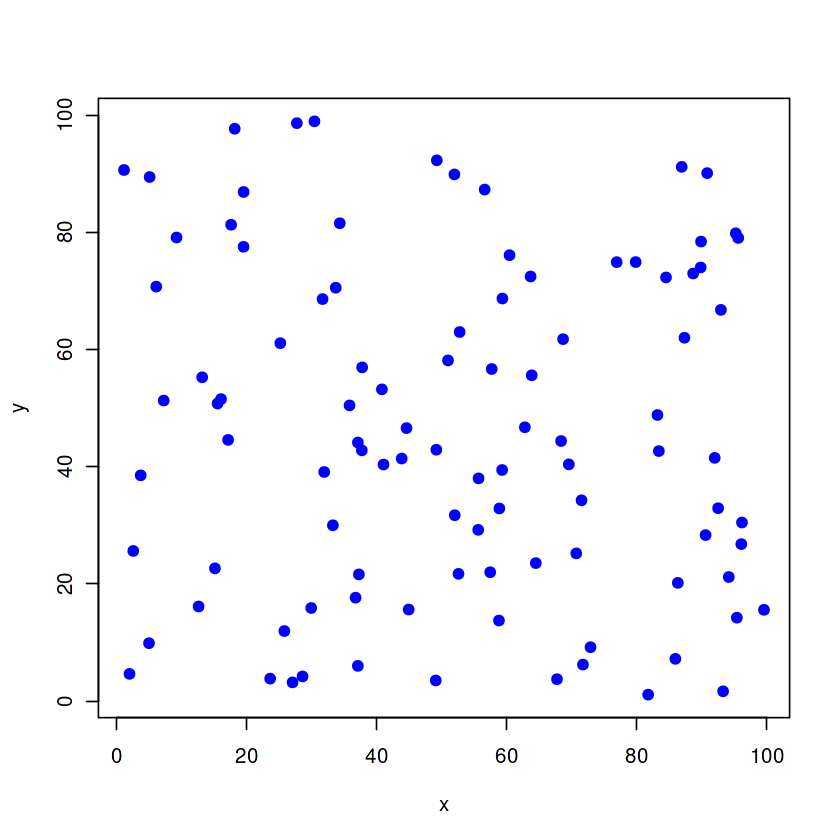

In [295]:
x <- runif(100, 1, 100)
y <- runif(100, 1, 100)

plot(x, y, pch = 19, col = "blue")

## f) Load a CSV file into a DataFrame and then create a line chart of one of the columns in the DataFrame.

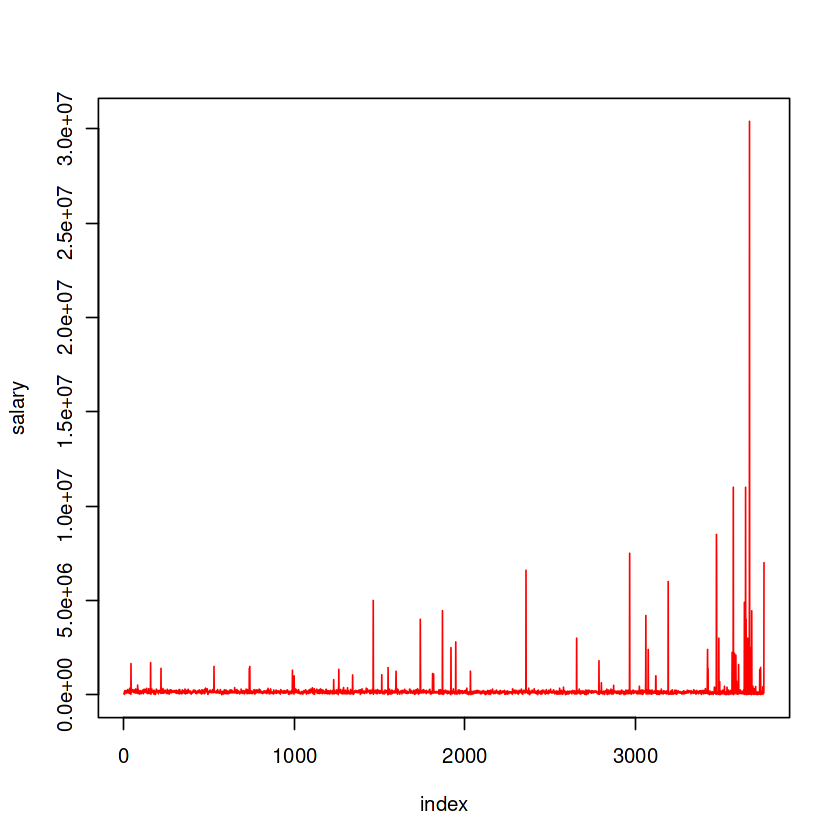

In [296]:
df <- read.csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

plot(df$salary, type = "l", xlab = "index", ylab = "salary",col = "red")


## 3. Data Import
The Echocardiogram data set in the UCI Machine Learning repository contains information on a set of
patients that suffered heart attacks at some point in the past.

### (a) Download the Echocardiogram data set and import it to a data frame. Read the information on the data set and find out how missing values are represented and make sure that they are properly represented.

In [1]:
file_path <- "/kaggle/input/echocardiogram/echocardiogram.data"
# Load dataset from .data file
dataset <- read.table(file_path, header = FALSE,sep = ",")
print(dataset)
# Count missing values represented as "?"
missing_values_count <- sum(dataset == "?" | is.na(dataset))

# Print the count of missing values
print(missing_values_count)

      V1 V2     V3 V4    V5     V6    V7     V8    V9   V10  V11 V12 V13
1     11  0     71  0 0.260      9 4.600     14     1     1 name   1   0
2     19  0     72  0 0.380      6 4.100     14 1.700 0.588 name   1   0
3     16  0     55  0 0.260      4 3.420     14     1     1 name   1   0
4     57  0     60  0 0.253 12.062 4.603     16 1.450 0.788 name   1   0
5     19  1     57  0 0.160     22 5.750     18 2.250 0.571 name   1   0
6     26  0     68  0 0.260      5 4.310     12     1 0.857 name   1   0
7     13  0     62  0 0.230     31 5.430   22.5 1.875 0.857 name   1   0
8     50  0     60  0 0.330      8 5.250     14     1     1 name   1   0
9     19  0     46  0 0.340      0 5.090     16 1.140 1.003 name   1   0
10    25  0     54  0 0.140     13 4.490   15.5 1.190 0.930 name   1   0
11    10  1     77  0 0.130     16 4.230     18 1.800 0.714 name   1   1
12    52  0     62  1 0.450      9 3.600     16 1.140 1.003 name   1   0
13    52  0     73  0 0.330      6     4     14    

### (b) Assign the attributes with meaningful names. You can look for this information on the same webpage.


In [17]:
# Replace dataset column names
column_names <- c("survival","still_alive" ,"age_at_heart_attack" ,"pericardial_effusion" ,"fractional_shortening" ,"epss","lvdd","wall_motion_score","wall_motion_index","mult","name","group","alive_at_1")
colnames(dataset) <- column_names
# Print the updated column names
print(head(dataset,n=5))

  survival still_alive age_at_heart_attack pericardial_effusion
1       11           0                  71                    0
2       19           0                  72                    0
3       16           0                  55                    0
4       57           0                  60                    0
5       19           1                  57                    0
  fractional_shortening   epss  lvdd wall_motion_score wall_motion_index  mult
1                 0.260      9 4.600                14                 1     1
2                 0.380      6 4.100                14             1.700 0.588
3                 0.260      4 3.420                14                 1     1
4                 0.253 12.062 4.603                16             1.450 0.788
5                 0.160     22 5.750                18             2.250 0.571
  name group alive_at_1
1 name     1          0
2 name     1          0
3 name     1          0
4 name     1          0
5 name     1          

### (c) According to that same information, is there any redundant or irrelevant attribute that you can remove? Remove them.


In [35]:
# Copy dataset
new_dataset <- data.frame(dataset)
# Delete rows where still_alive column is 0 or still alive is ?
new_dataset <- subset(new_dataset, still_alive != 0 & still_alive != '?')

# Delete the "wall_motion" column from the dataset is the same than wall-motion-index it can be redundant
new_dataset <- new_dataset[, -which(colnames(new_dataset) == "wall_motion_score")]

# Delete the "name" column from the dataset because has the same value in all rows
new_dataset <- new_dataset[, -which(colnames(new_dataset) == "name")]

# Delete the "mult" column from the dataset beacuse can be ignored
new_dataset <- new_dataset[, -which(colnames(new_dataset) == "mult")]

# Delete the "group" column from the dataset becase is insignificant
new_dataset <- new_dataset[, -which(colnames(new_dataset) == "group")]

# Print the modified dataset
print(new_dataset)

    survival still_alive age_at_heart_attack pericardial_effusion
5         19           1                  57                    0
11        10           1                  77                    0
15       0.5           1                  62                    0
17       0.5           1                  69                    1
18       0.5           1              62.529                    1
19        22           1                  66                    0
20         1           1                  66                    1
21      0.75           1                  69                    0
22      0.75           1                  85                    1
23       0.5           1                  73                    0
24         5           1                  71                    0
29      0.25           1                  75                    0
31         1           1                  65                    0
32         1           1                  52                    1
33        

### (d) Is there any data type change that you find useful? Perform it.

In [36]:
# Load the dplyr package
library(dplyr)
print("dataset before")
print(new_dataset)
# Exclude 'alive_at_1' column from columns to consider
columns_to_replace <- setdiff(colnames(dataset), 'alive_at_1')

# Replace NAs with column medians
dataset <- dataset %>%
  mutate(across(all_of(columns_to_replace), ~ifelse(is.na(.), median(., na.rm = TRUE), .)))

#Fix rows where 'alive_at_1' contains "?" based on the 'survival' and 'still_alive' columns
new_dataset$alive_at_1 <- ifelse(new_dataset$alive_at_1 != "?",
                                new_dataset$alive_at_1,
                                ifelse(new_dataset$survival > 12 & new_dataset$still_alive == 1, 1, 0))
                                         
# Print the updated data frame
print("dataset after")
print(new_dataset)

[1] "dataset before"
    survival still_alive age_at_heart_attack pericardial_effusion
5         19           1                  57                    0
11        10           1                  77                    0
15       0.5           1                  62                    0
17       0.5           1                  69                    1
18       0.5           1              62.529                    1
19        22           1                  66                    0
20         1           1                  66                    1
21      0.75           1                  69                    0
22      0.75           1                  85                    1
23       0.5           1                  73                    0
24         5           1                  71                    0
29      0.25           1                  75                    0
31         1           1                  65                    0
32         1           1                  52           

## 4. Data Manipulation
Load the airquality data set regarding a set of New York Air Quality Measurements.


In [321]:
# Load the CSV dataset
dataset <- read.csv("/kaggle/input/new-york-air-quality/airquality.csv")

# Print the dataset
print(dataset)

    Ozone Solar.R Wind Temp Month Day
1      41     190  7.4   67     5   1
2      36     118  8.0   72     5   2
3      12     149 12.6   74     5   3
4      18     313 11.5   62     5   4
5      NA      NA 14.3   56     5   5
6      28      NA 14.9   66     5   6
7      23     299  8.6   65     5   7
8      19      99 13.8   59     5   8
9       8      19 20.1   61     5   9
10     NA     194  8.6   69     5  10
11      7      NA  6.9   74     5  11
12     16     256  9.7   69     5  12
13     11     290  9.2   66     5  13
14     14     274 10.9   68     5  14
15     18      65 13.2   58     5  15
16     14     334 11.5   64     5  16
17     34     307 12.0   66     5  17
18      6      78 18.4   57     5  18
19     30     322 11.5   68     5  19
20     11      44  9.7   62     5  20
21      1       8  9.7   59     5  21
22     11     320 16.6   73     5  22
23      4      25  9.7   61     5  23
24     32      92 12.0   61     5  24
25     NA      66 16.6   57     5  25
26     NA   

### (n) For which attributes are there missing values?


In [322]:
# Check for missing values in each attribute
missing_values <- colSums(is.na(dataset))
attributes_with_missing_values <- names(missing_values[missing_values > 0])
print(attributes_with_missing_values)

[1] "Ozone"   "Solar.R"


### (o) Do all the attributes are in the most suitable data type? Make the changes you find necessary.


In [324]:
# Check the data types of the attributes
attribute_data_types <- sapply(dataset, class)
print(attribute_data_types)

# Replace NAs in each column with the mean of each column, excluding non-numeric values
for (col in colnames(dataset)) {
  # Check if column contains non-numeric values
  if (!is.numeric(dataset[[col]])) {
    # Find non-numeric values and replace with NA
    non_numeric_values <- !is.numeric(dataset[[col]])
    dataset[[col]][non_numeric_values] <- NA
  }
  
  # Calculate mean and replace NAs
  mean_value <- mean(dataset[[col]], na.rm = TRUE)
  dataset[[col]][is.na(dataset[[col]])] <- mean_value
}

# Print the modified dataset
print(dataset)


    Ozone   Solar.R      Wind      Temp     Month       Day 
"integer" "integer" "numeric" "integer" "integer" "integer" 
        Ozone  Solar.R Wind Temp Month Day
1    41.00000 190.0000  7.4   67     5   1
2    36.00000 118.0000  8.0   72     5   2
3    12.00000 149.0000 12.6   74     5   3
4    18.00000 313.0000 11.5   62     5   4
5    42.12931 185.9315 14.3   56     5   5
6    28.00000 185.9315 14.9   66     5   6
7    23.00000 299.0000  8.6   65     5   7
8    19.00000  99.0000 13.8   59     5   8
9     8.00000  19.0000 20.1   61     5   9
10   42.12931 194.0000  8.6   69     5  10
11    7.00000 185.9315  6.9   74     5  11
12   16.00000 256.0000  9.7   69     5  12
13   11.00000 290.0000  9.2   66     5  13
14   14.00000 274.0000 10.9   68     5  14
15   18.00000  65.0000 13.2   58     5  15
16   14.00000 334.0000 11.5   64     5  16
17   34.00000 307.0000 12.0   66     5  17
18    6.00000  78.0000 18.4   57     5  18
19   30.00000 322.0000 11.5   68     5  19
20   11.00000  44.

### (p) What period of the year do these records refer to?


In [325]:
# Calculate the minimum and maximum values of the month column
min_month <- min(dataset$Month)
max_month <- max(dataset$Month)

# Print the results
print(paste("Period from month:", min_month, "to month:", max_month))

[1] "Period from month: 5 to month: 9"


### (q) Load the package dplyr and save the data set in a table data frame format.


In [328]:
# Load the dplyr package
library(dplyr)
# Save the dataset as a table data frame
dataset_table <- as.data.frame(dataset)

### (r) Select the days in May with a temperature above 70 Fahrenheit.


In [329]:
# Select days in May with temperature above 70 Fahrenheit
may_above_70 <- dataset_table %>%
  filter(Month == 5, Temp > 70)

print(may_above_70)

  Ozone  Solar.R Wind Temp Month Day
1    36 118.0000  8.0   72     5   2
2    12 149.0000 12.6   74     5   3
3     7 185.9315  6.9   74     5  11
4    11 320.0000 16.6   73     5  22
5    45 252.0000 14.9   81     5  29
6   115 223.0000  5.7   79     5  30
7    37 279.0000  7.4   76     5  31


### (s) Create a new attribute TempC which represents the temperature values in Celsius.


In [330]:
# Create new attribute TempC (temperature in Celsius)
dataset_table <- dataset_table %>%
  mutate(TempC = (Temp - 32) * 5/9)

print(dataset_table)

        Ozone  Solar.R Wind Temp Month Day    TempC
1    41.00000 190.0000  7.4   67     5   1 19.44444
2    36.00000 118.0000  8.0   72     5   2 22.22222
3    12.00000 149.0000 12.6   74     5   3 23.33333
4    18.00000 313.0000 11.5   62     5   4 16.66667
5    42.12931 185.9315 14.3   56     5   5 13.33333
6    28.00000 185.9315 14.9   66     5   6 18.88889
7    23.00000 299.0000  8.6   65     5   7 18.33333
8    19.00000  99.0000 13.8   59     5   8 15.00000
9     8.00000  19.0000 20.1   61     5   9 16.11111
10   42.12931 194.0000  8.6   69     5  10 20.55556
11    7.00000 185.9315  6.9   74     5  11 23.33333
12   16.00000 256.0000  9.7   69     5  12 20.55556
13   11.00000 290.0000  9.2   66     5  13 18.88889
14   14.00000 274.0000 10.9   68     5  14 20.00000
15   18.00000  65.0000 13.2   58     5  15 14.44444
16   14.00000 334.0000 11.5   64     5  16 17.77778
17   34.00000 307.0000 12.0   66     5  17 18.88889
18    6.00000  78.0000 18.4   57     5  18 13.88889
19   30.0000

### (t) Inspect which were the 30 hottest days.


In [331]:
# Inspect the 30 hottest days
hottest_30_days <- dataset_table %>%
  arrange(desc(TempC)) %>%
  head(30)

print(hottest_30_days)

       Ozone  Solar.R Wind Temp Month Day    TempC
1   76.00000 203.0000  9.7   97     8  28 36.11111
2   84.00000 237.0000  6.3   96     8  30 35.55556
3  118.00000 225.0000  2.3   94     8  29 34.44444
4   85.00000 188.0000  6.3   94     8  31 34.44444
5   42.12931 259.0000 10.9   93     6  11 33.88889
6   73.00000 183.0000  2.8   93     9   3 33.88889
7   91.00000 189.0000  4.6   93     9   4 33.88889
8   42.12931 250.0000  9.2   92     6  12 33.33333
9   97.00000 267.0000  6.3   92     7   8 33.33333
10  97.00000 272.0000  5.7   92     7   9 33.33333
11  42.12931 222.0000  8.6   92     8  10 33.33333
12  78.00000 197.0000  5.1   92     9   2 33.33333
13  42.12931 291.0000 14.9   91     7  14 32.77778
14  96.00000 167.0000  6.9   91     9   1 32.77778
15  71.00000 291.0000 13.8   90     6   9 32.22222
16  89.00000 229.0000 10.3   90     8   8 32.22222
17 110.00000 207.0000  8.0   90     8   9 32.22222
18  85.00000 175.0000  7.4   89     7  10 31.66667
19 122.00000 255.0000  4.0   89

### (u) Inspect which were the hottest days, but also with the highest ozone values.


In [332]:
# Sort the dataset by hottest days and then by ozone values
sorted_dataset <- dataset_table %>%
  arrange(desc(TempC), desc(Ozone)) %>%
    head(10)

print(sorted_dataset)

       Ozone Solar.R Wind Temp Month Day    TempC
1   76.00000     203  9.7   97     8  28 36.11111
2   84.00000     237  6.3   96     8  30 35.55556
3  118.00000     225  2.3   94     8  29 34.44444
4   85.00000     188  6.3   94     8  31 34.44444
5   91.00000     189  4.6   93     9   4 33.88889
6   73.00000     183  2.8   93     9   3 33.88889
7   42.12931     259 10.9   93     6  11 33.88889
8   97.00000     267  6.3   92     7   8 33.33333
9   97.00000     272  5.7   92     7   9 33.33333
10  78.00000     197  5.1   92     9   2 33.33333


### (v) Inspect the number of days for which there was a register for each month.


In [333]:
# Group the dataset by month and count the number of days
days_per_month <- dataset_table %>%
  group_by(month = Month) %>%
  summarize(num_of_days = n())

print(days_per_month)

# A tibble: 5 × 2
  month num_of_days
  <dbl>       <int>
1     5          31
2     6          30
3     7          31
4     8          31
5     9          30


### (w) For each month, obtain the minimum and the maximum temperature registered in Celsius.


In [334]:
# Group the dataset by month and calculate minimum and maximum temperature
temp_per_month <- dataset_table %>%
  group_by(month = Month) %>%
  summarize(min_temp = min(TempC), max_temp = max(TempC))

print(temp_per_month)

# A tibble: 5 × 3
  month min_temp max_temp
  <dbl>    <dbl>    <dbl>
1     5     13.3     27.2
2     6     18.3     33.9
3     7     22.8     33.3
4     8     22.2     36.1
5     9     17.2     33.9


### (x) Obtain the average of the following parameters by month: temperature in celsius, wind, solar radiation and ozone.


In [335]:
# Group the dataset by month and calculate the average of parameters
average_parameters <- dataset_table %>%
  group_by(month = Month) %>%
  summarize(avg_temp = mean(TempC),
            avg_wind = mean(Wind),
            avg_solar_rad = mean(Solar.R),
            avg_ozone = mean(Ozone))

print(average_parameters)

# A tibble: 5 × 5
  month avg_temp avg_wind avg_solar_rad avg_ozone
  <dbl>    <dbl>    <dbl>         <dbl>     <dbl>
1     5     18.6    11.6           182.      26.6
2     6     26.2    10.3           190.      38.3
3     7     28.8     8.94          216.      56.4
4     8     28.9     8.79          173.      57.1
5     9     24.9    10.2           167.      31.8


### (y) What values did you obtain regarding ozone and solar radiation attributes? Why? Make the necessary change so that you get the average of the registered values.

I did't have any problems because i fixed NAs in preprocessing :)